In [1]:
import pandas as pd
import numpy as np
import re

import nltk
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers,Sequential
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\user\Anaconda3\envs\nlp_new\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\user\Anaconda3\envs\nlp_new\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\user\Anaconda3\envs\nlp_new\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be und

In [2]:
train = pd.read_csv("G:/NLP/Corono Sentiment Analysis/Corona_NLP_train.csv",encoding='latin-1')

In [3]:
train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [4]:
test = pd.read_csv("G:/NLP/Corono Sentiment Analysis/Corona_NLP_test.csv",encoding='latin-1')

In [5]:
test.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [6]:
train["Sentiment"].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [7]:
train.shape

(41157, 6)

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

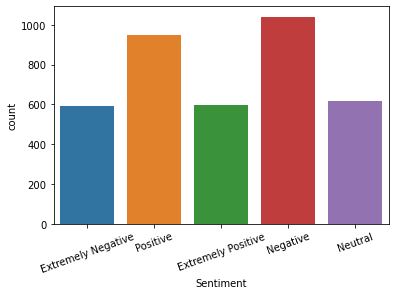

In [9]:
sns.countplot(x=test["Sentiment"],data=test)
plt.xticks(rotation=20)
plt.show()

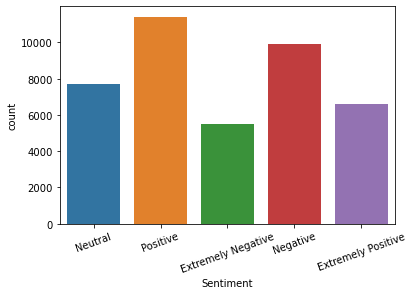

In [10]:
sns.countplot(x=train["Sentiment"],data=train)
plt.xticks(rotation=20)
plt.show()

Training Data Preprocessing:

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [12]:
df = train.copy()

In [13]:
df = df.drop(["UserName","ScreenName","Location","TweetAt"],axis=1)

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()

In [16]:
df["Sentiment"] = le.fit_transform(df["Sentiment"])

In [17]:
df["Sentiment"].value_counts()

4    11422
2     9917
3     7713
1     6624
0     5481
Name: Sentiment, dtype: int64

In [18]:
ps = PorterStemmer()

In [19]:
stop = stopwords.words('english')

In [20]:
def clean_text(text):
    text = re.sub(r"won't","will not",text)
    text = re.sub(r"can\'t","can not",text)
    
    text = re.sub(r"n\'t","not",text)
    text = re.sub(r"\'s","is",text)
    text = re.sub(r"\'d","would",text)
    text = re.sub(r"\'ll","will",text)
    text = re.sub(r"\'t","not",text)
    text = re.sub(r"\'ve","have",text)
    text = re.sub(r"\'m","am",text)
    
    
    text = re.sub(r'http\S+','',text)
    text = re.sub(r'@\w+','',text)
    text = re.sub(r'#\w+','',text)
    text = re.sub(r'<.*?>','',text)
    text = text.split()
    
    text = ' '.join([word.lower() for word in text if word.lower() not in stop])
    
    return text

In [21]:
clean_data = df["OriginalTweet"].apply(clean_text)

In [22]:
clean_data

0                                                         
1        advice talk neighbours family exchange phone n...
2        coronavirus australia: woolworths give elderly...
3        food stock one empty... please, donot panic, e...
4        me, ready go supermarket outbreak. iam paranoi...
                               ...                        
41152    airline pilots offering stock supermarket shel...
41153    response complaint provided citing covid-19 re...
41154    know itâs getting tough rationing toilet pape...
41155         wrong smell hand sanitizer starting turn on?
41156    well new/used rift going $700.00 amazon rn alt...
Name: OriginalTweet, Length: 41157, dtype: object

In [23]:
# new_data = []
# for i in range(len(df["OriginalTweet"])):
#     words = re.sub("[^a-zA-Z]"," ",df["OriginalTweet"][i])
#     words = words.lower()
#     review_words = words.split()
#     review_words = re.sub(r'^https',' ',review_words)
    
#     stop_word_removal = [word for word in review_words if not word in set(stopwords.words('english'))]
#     stem = [ps.stem(word) for word in stop_word_removal]
    
#     text = ' '.join(stem)
#     new_data.append(text)
    

In [24]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_data)

In [25]:
sequence = tokenizer.texts_to_sequences(clean_data)

In [26]:
vocab_size = len(tokenizer.word_index) + 1
max_len = max(clean_data.apply(len))
x = pad_sequences(sequence, max_len, padding='post')


In [27]:
x.shape

(41157, 286)

In [31]:
batch_size = 64
epochs = 4
embedding_dim = 16
model = Sequential([
    layers.Embedding(vocab_size,embedding_dim,input_length=max_len),
    layers.Bidirectional(layers.GRU(256,return_sequences=True)),
    layers.GlobalMaxPool1D(),
    layers.Dense(64,activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(5,activation='sigmoid')    
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 286, 16)           609296    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 286, 512)          419328    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                32832     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 325       
Total params: 1,061,781
Trainable params: 1,061,781
Non-trainable params: 0
____________________________________________

In [32]:
y = df["Sentiment"]

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(x,y,epochs=epochs,batch_size=batch_size,validation_split=0.1)

Train on 37041 samples, validate on 4116 samples
Epoch 1/4
 8832/37041 [======>.......................] - ETA: 1:03:30 - loss: 1.5632 - acc: 0.2816